In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [27]:
# load the dataset
df = pd.read_csv("insurance.csv")

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
#Collecting null places
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
#Showing unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [32]:
df.columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


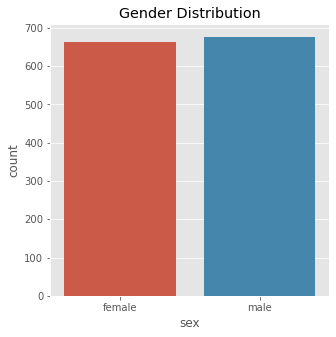

In [33]:
#Gender CountPlot
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

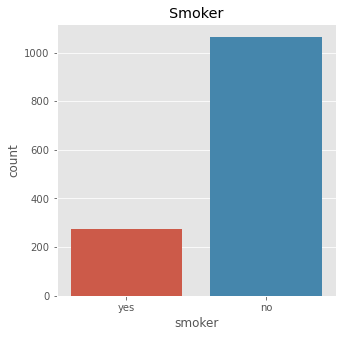

In [34]:
#Smoker CountPlot
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

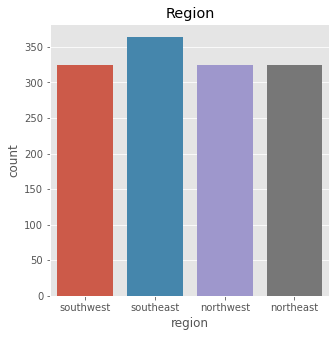

In [35]:
#Region CountPlot
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Charges vs Region')

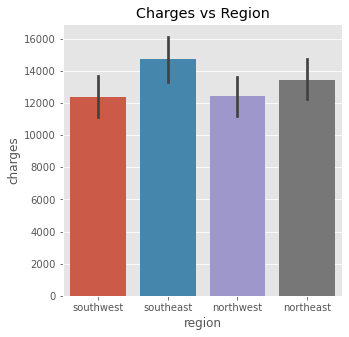

In [36]:
#Region Vs Charges BarPlot
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Charges vs Region')

Text(0.5, 1.0, 'Charges for Gender_Smokers')

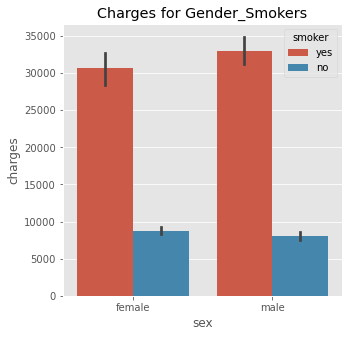

In [37]:
#Charges for gender smoker barPlot
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for Gender_Smokers')

<AxesSubplot:xlabel='region', ylabel='charges'>

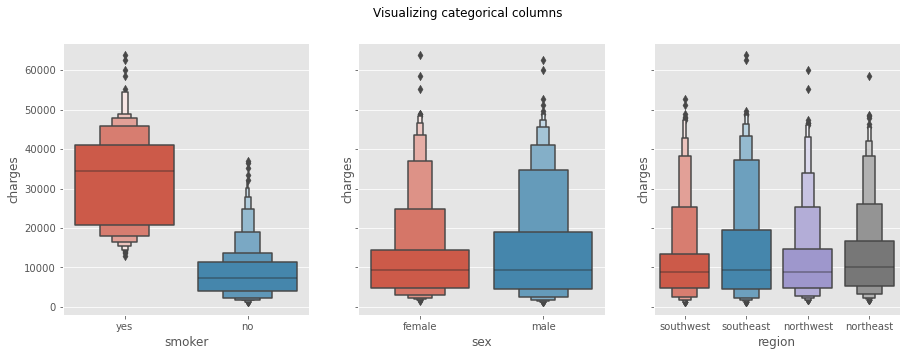

In [38]:
#Charges Vs Gender,Smoker,Region boxenplot
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes[2])

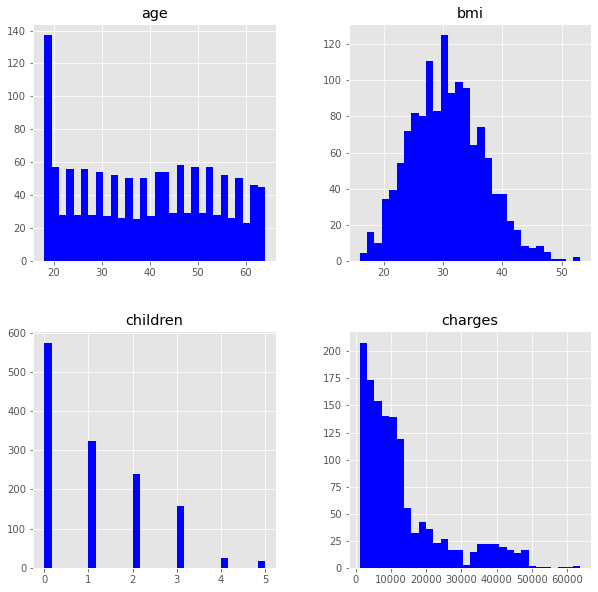

In [39]:
#Data Histing
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [40]:
#Mapping of Data
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

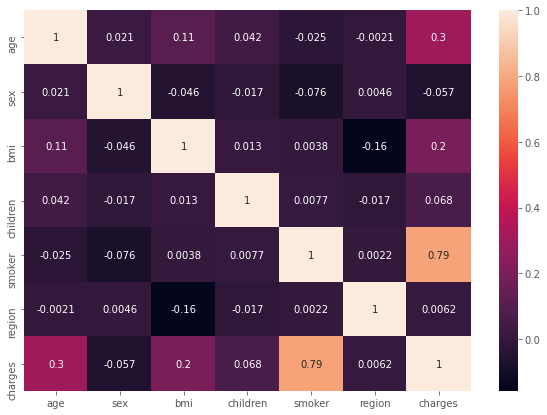

In [41]:
#Heatmap of Data
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [42]:
#Normalization Using Simple Scaling Features
df["age"] = df["age"]/(df["age"].max())
df["sex"] = df["sex"]/(df["sex"].max())
df["bmi"] = df["bmi"]/(df["bmi"].max())
df["children"] = df["children"]/(df["children"].max())
df["smoker"] = df["smoker"]/(df["smoker"].max())
df["region"] = df["region"]/(df["region"].max())

In [43]:
#Prepairing Data

# define features (X) and the target variable (y)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# scale the features
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

# Split the dataset into 70% training and 30% testing sets
split_ratio = 0.7
split_index = int(split_ratio * len(df))

X_train = X_scaled[:split_index]
y_train = y[:split_index]
X_test = X_scaled[split_index:]
y_test = y[split_index:]

In [44]:
#Implementation of Linear Regression
def linear_regression(X, y, learning_rate, iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(iterations):
        y_predicted = np.dot(X, weights) + bias
        dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1/n_samples) * np.sum(y_predicted - y)
        
        weights -= learning_rate * dw
        bias -= learning_rate * db

    # Calculate Mean Squared Error manually
    mse = np.mean((y_predicted - y) ** 2)
    
    return weights, bias, mse


# A more suitable learning rate
learning_rate = 0.1
# increased number of iterations for better convergence
iterations = 100000
weights, bias, mse = linear_regression(X_train, y_train, learning_rate, iterations)

In [45]:
#Prediction
new_patient_data = np.array([24, 1, 23.50, 0, 0, 3])
new_patient_data_scaled = (new_patient_data - X_mean) / X_std
new_patient_charges = np.dot(new_patient_data_scaled, weights) + bias
print("Predicted charges for the new patient:", new_patient_charges)

Predicted charges for the new patient: 806283.2816367651
